In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from itertools import combinations 
import scipy.stats as stats
import scipy
# from scipy.stats import ttest_indcou
from scipy.stats import fisher_exact
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# autoreload
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [15]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Import Dataset

In [4]:
cardio = pd.read_csv('../data/Cardiovascular_cleaned.csv')
cardio.shape

(308854, 19)

# Hypothesis test

Null Hypothesis (H0): There is no significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

Alternative Hypothesis (Ha): There is a significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

## T - Test Heart_Disease yes/no for all four columns 

In [5]:
# Define the categories you want to compare
categories = ["Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

# Define the alpha value
alpha = 0.05

# Perform t-test for each category
for category in categories:
    for hd_category in cardio["Heart_Disease"].unique():
        group_0 = cardio[category][cardio["Heart_Disease"] == hd_category]
        group_1 = cardio[category][cardio["Heart_Disease"] != hd_category]
        t_statistic, p_value = ttest_ind(group_0, group_1, equal_var=False)
        print(f"T-test for {category} and Heart_Disease={hd_category}:")
        print(f"T-statistic: {t_statistic}")
        print(f"P-value: {p_value}")
        if p_value < alpha:
            print("The difference is statistically significant.\n")
        else:
            print("The difference is not statistically significant.\n")

T-test for Alcohol_Consumption and Heart_Disease=No:
T-statistic: 20.450951787434544
P-value: 2.5640209275570343e-92
The difference is statistically significant.

T-test for Alcohol_Consumption and Heart_Disease=Yes:
T-statistic: -20.450951787434544
P-value: 2.5640209275570343e-92
The difference is statistically significant.

T-test for Fruit_Consumption and Heart_Disease=No:
T-statistic: 11.326455555886188
P-value: 1.1165920567363132e-29
The difference is statistically significant.

T-test for Fruit_Consumption and Heart_Disease=Yes:
T-statistic: -11.326455555886188
P-value: 1.1165920567363132e-29
The difference is statistically significant.

T-test for Green_Vegetables_Consumption and Heart_Disease=No:
T-statistic: 14.196454879078571
P-value: 1.3501822352236017e-45
The difference is statistically significant.

T-test for Green_Vegetables_Consumption and Heart_Disease=Yes:
T-statistic: -14.196454879078571
P-value: 1.3501822352236017e-45
The difference is statistically significant.

T-

# Mann-WhitneyU Test for all four columns

In [22]:
# group_A = cardio[cardio["Heart_Disease"] == 'Yes']["Alcohol_Consumption"] 
# group_B = cardio[cardio["Heart_Disease"] == 'No']["Alcohol_Consumption"] 
# stat, p_value = mannwhitneyu(group_A, group_B, alternative='two-sided')
# print(stat, p_value)

In [25]:
# Define the column names and categories
columns = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
categories = ['Yes', 'No']

# Define the alpha value
alpha = 0.05

# Loop through each column and perform the Mann-Whitney U test
for col in columns:
    for cat in categories:
        group1 = cardio[cardio['Heart_Disease'] == cat][col]
        group2 = cardio[cardio['Heart_Disease'] != cat][col]

        stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
        
        print(f"\nMann-Whitney U test for {col} and Heart_Disease={cat}:")
        print(f"Mann-Whitney U statistic: {stat}")
        print(f"P-value: {p_value}")

        if p_value < alpha:
            print("The difference is statistically significant.")
        else:
            print("There is no significant difference.")


Mann-Whitney U test for Alcohol_Consumption and Heart_Disease=Yes:
Mann-Whitney U statistic: 3006144385.5
P-value: 0.0
The difference is statistically significant.

Mann-Whitney U test for Alcohol_Consumption and Heart_Disease=No:
Mann-Whitney U statistic: 4082698007.5
P-value: 0.0
The difference is statistically significant.

Mann-Whitney U test for Fruit_Consumption and Heart_Disease=Yes:
Mann-Whitney U statistic: 3374577681.0
P-value: 2.3590727367213727e-37
The difference is statistically significant.

Mann-Whitney U test for Fruit_Consumption and Heart_Disease=No:
Mann-Whitney U statistic: 3714264712.0
P-value: 2.3590727367213727e-37
The difference is statistically significant.

Mann-Whitney U test for Green_Vegetables_Consumption and Heart_Disease=Yes:
Mann-Whitney U statistic: 3340434951.0
P-value: 3.777408343216292e-52
The difference is statistically significant.

Mann-Whitney U test for Green_Vegetables_Consumption and Heart_Disease=No:
Mann-Whitney U statistic: 3748407442.0
P

# Mann-WhitneyU test results in table format

In [21]:
# Results data
columns = ['Category', 'Heart_Disease', 'Mann_Whitney_U', 'P_Value']
data = [
    ['Alcohol_Consumption', 'Yes', 3006144385.5, 0.0],
    ['Alcohol_Consumption', 'No', 4082698007.5, 0.0],
    ['Fruit_Consumption', 'Yes', 3374577681.0, 2.3590727367213727e-37],
    ['Fruit_Consumption', 'No', 3714264712.0, 2.3590727367213727e-37],
    ['Green_Vegetables_Consumption', 'Yes', 3340434951.0, 3.777408343216292e-52],
    ['Green_Vegetables_Consumption', 'No', 3748407442.0, 3.777408343216292e-52],
    ['FriedPotato_Consumption', 'Yes', 3368543401.5, 1.8633472341292425e-39],
    ['FriedPotato_Consumption', 'No', 3720298991.5, 1.8633472341292425e-39]
]

# Create a DataFrame
result_df = pd.DataFrame(data, columns=columns)

# Display the table
print(result_df)

# result_df.hist(bins=100, figsize = [20, 10])

                       Category Heart_Disease  Mann_Whitney_U       P_Value
0           Alcohol_Consumption           Yes    3.006144e+09  0.000000e+00
1           Alcohol_Consumption            No    4.082698e+09  0.000000e+00
2             Fruit_Consumption           Yes    3.374578e+09  2.359073e-37
3             Fruit_Consumption            No    3.714265e+09  2.359073e-37
4  Green_Vegetables_Consumption           Yes    3.340435e+09  3.777408e-52
5  Green_Vegetables_Consumption            No    3.748407e+09  3.777408e-52
6       FriedPotato_Consumption           Yes    3.368543e+09  1.863347e-39
7       FriedPotato_Consumption            No    3.720299e+09  1.863347e-39


For the above table: 
The Mann-Whitney U statistic is a test statistic from the Mann-Whitney U test. It measures the rank-sum difference between the two groups. The larger the U value, the more evidence there is of a difference between the distributions of the two groups. It is used in hypothesis testing to calculate the probability of observing such differences if the null hypothesis (no difference between the groups) is true.

the Mann-Whitney U test results indicate that there are very large and highly statistically significant differences in consumption levels between individuals with heart disease and those without heart disease. This suggests that the consumption patterns for Alcohol, Fruit, Green Vegetables, and Fried Potatoes differ significantly between the two groups.

# Fishers exact test

In [10]:
# Create a frequency table (contingency table) using crosstab for each categorical variable
alcohol_vs_heart_disease = pd.crosstab(cardio["Heart_Disease"], cardio["Alcohol_Consumption"])
fruit_vs_heart_disease = pd.crosstab(cardio["Heart_Disease"], cardio["Fruit_Consumption"])
green_vegetables_vs_heart_disease = pd.crosstab(cardio["Heart_Disease"], cardio["Green_Vegetables_Consumption"])
fried_potato_vs_heart_disease = pd.crosstab(cardio["Heart_Disease"], cardio["FriedPotato_Consumption"])

# Concatenate the separate DataFrames into the frequency table
frequency_table = pd.concat([alcohol_vs_heart_disease, fruit_vs_heart_disease,
                            green_vegetables_vs_heart_disease, fried_potato_vs_heart_disease],
                           axis=1, keys=["Alcohol_Consumption", "Fruit_Consumption",
                                       "Green_Vegetables_Consumption", "FriedPotato_Consumption"])

# Display the frequency table
print(frequency_table)

              Alcohol_Consumption                                          \
                            0.0    1.0    2.0    3.0    4.0   5.0   6.0     
Heart_Disease                                                               
No                         125443  23185  18531  10831  21980  9165  3346   
Yes                         14819   1798   1209    648   1387   457   172   

                                  ... FriedPotato_Consumption              \
              7.0    8.0   9.0    ...                   95.0  96.0  97.0    
Heart_Disease                     ...                                       
No             2460  12825   227  ...                       1     6     0   
Yes             112    613    12  ...                       0     2     1   

                                                         
              98.0  99.0  100.0 112.0 120.0 124.0 128.0  
Heart_Disease                                            
No                1    42     2     1   192     1     

In [11]:
# Putting results into an easier to read table

# Choose four categories to compare for each variable
alcohol_categories = [0.0, 1.0]  # Do NOT consume Alcohol 0.0 and 1.0 DO consume Alcohol
fruit_categories = [0.0, 1.0]    # Do NOT consume fruit 0.0 and 1.0 DO consume fruit
green_vegetables_categories = [0.0, 1.0]  # Example: Do NOT consume Green Vegetables 0.0 and 1.0 DO consume Green Vegetables
fried_potato_categories = [0.0, 1.0]     # Example: Do NOT consume FriedPotato 0.0 and 1.0 DO consume FriedPotato

# Perform Fisher's exact test for each comparison
result_alcohol = fisher_exact(pd.crosstab(cardio["Heart_Disease"], cardio["Alcohol_Consumption"].isin(alcohol_categories)))
result_fruit = fisher_exact(pd.crosstab(cardio["Heart_Disease"], cardio["Fruit_Consumption"].isin(fruit_categories)))
result_green_vegetables = fisher_exact(pd.crosstab(cardio["Heart_Disease"], cardio["Green_Vegetables_Consumption"].isin(green_vegetables_categories)))
result_fried_potato = fisher_exact(pd.crosstab(cardio["Heart_Disease"], cardio["FriedPotato_Consumption"].isin(fried_potato_categories)))

# Display the results
results_df = pd.DataFrame({
    "Category": ["Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"],
    "Odds Ratio": [result_alcohol[0], result_fruit[0], result_green_vegetables[0], result_fried_potato[0]],
    "P-Value": [result_alcohol[1], result_fruit[1], result_green_vegetables[1], result_fried_potato[1]]
})

print(results_df)

# Odds ratio shows how many more times likely to have Heart Disease

                       Category  Odds Ratio       P-Value
0           Alcohol_Consumption    1.810134  0.000000e+00
1             Fruit_Consumption    1.317861  1.145664e-17
2  Green_Vegetables_Consumption    1.288591  3.076211e-33
3       FriedPotato_Consumption    1.275012  2.396764e-59


Chi-square test between heart disease and the four columns

In [12]:
# Define the categories you want to compare
categories = ["Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

# Specify the significance level (alpha)
alpha = 0.05

# Perform Chi-square test for each category
for category in categories:
    contingency_table = pd.crosstab(cardio[category], cardio["Heart_Disease"])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {category}:")
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print("The difference is statistically significant.\n")
    else:
        print("The difference is not statistically significant.\n")

Chi-square test for Alcohol_Consumption:
Chi-square value: 2490.5084503496464
P-value: 0.0
The difference is statistically significant.

Chi-square test for Fruit_Consumption:
Chi-square value: 449.136221776519
P-value: 2.571515888115319e-54
The difference is statistically significant.

Chi-square test for Green_Vegetables_Consumption:
Chi-square value: 428.72143374827647
P-value: 2.159617726977898e-51
The difference is statistically significant.

Chi-square test for FriedPotato_Consumption:
Chi-square value: 459.9679170505369
P-value: 1.5257063846852023e-59
The difference is statistically significant.



# I reject my H null based on these results

array([[<Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>],
       [<Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >,
        <Axes: >]], dtype=object)

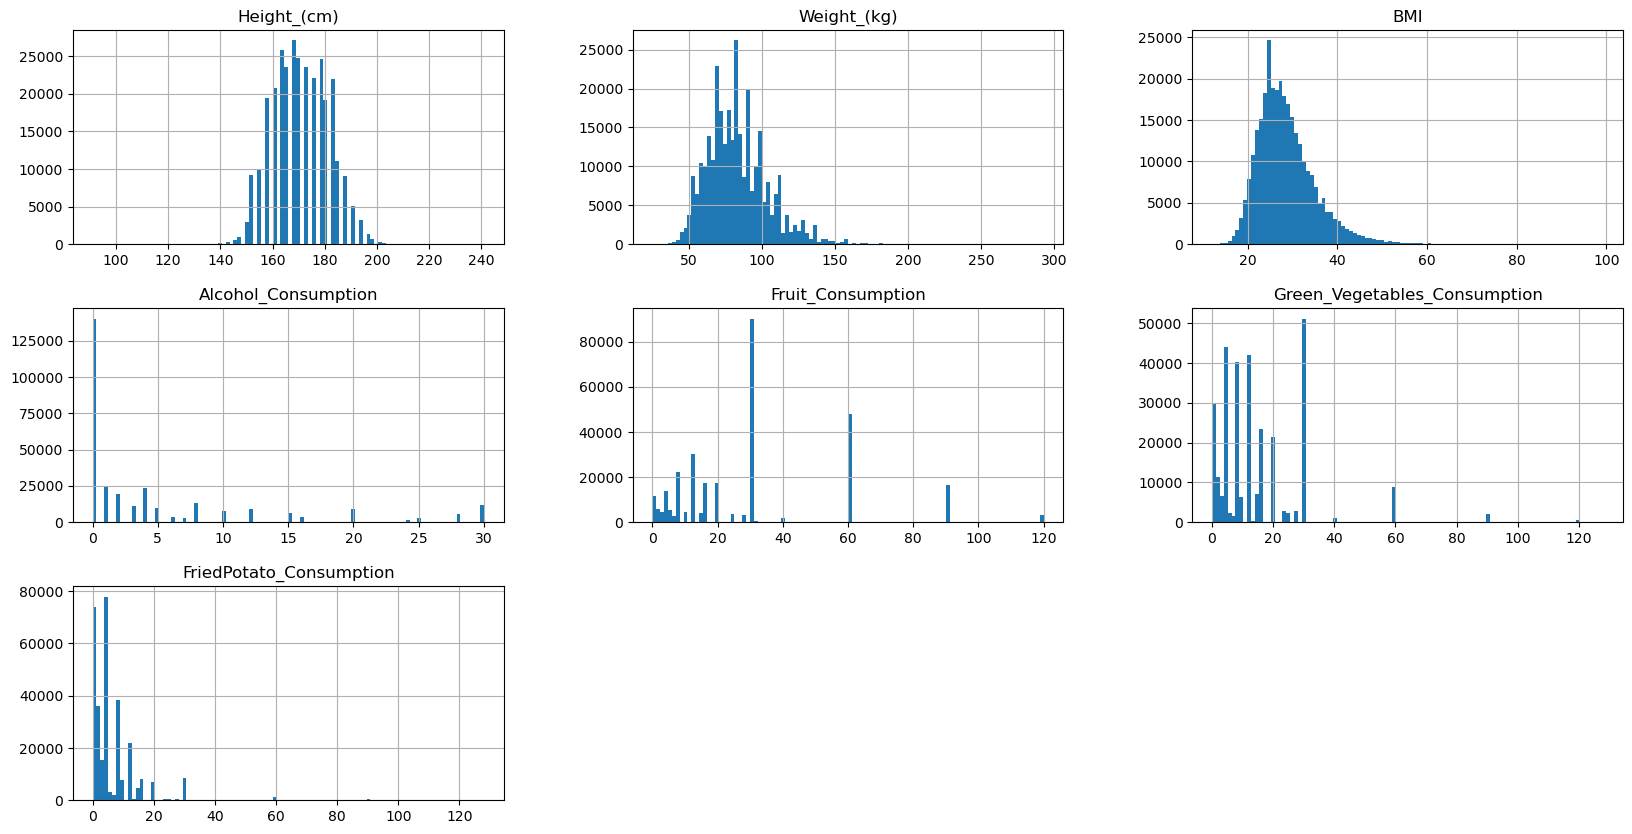

In [62]:
cardio.hist(bins=100, figsize = [20, 10])

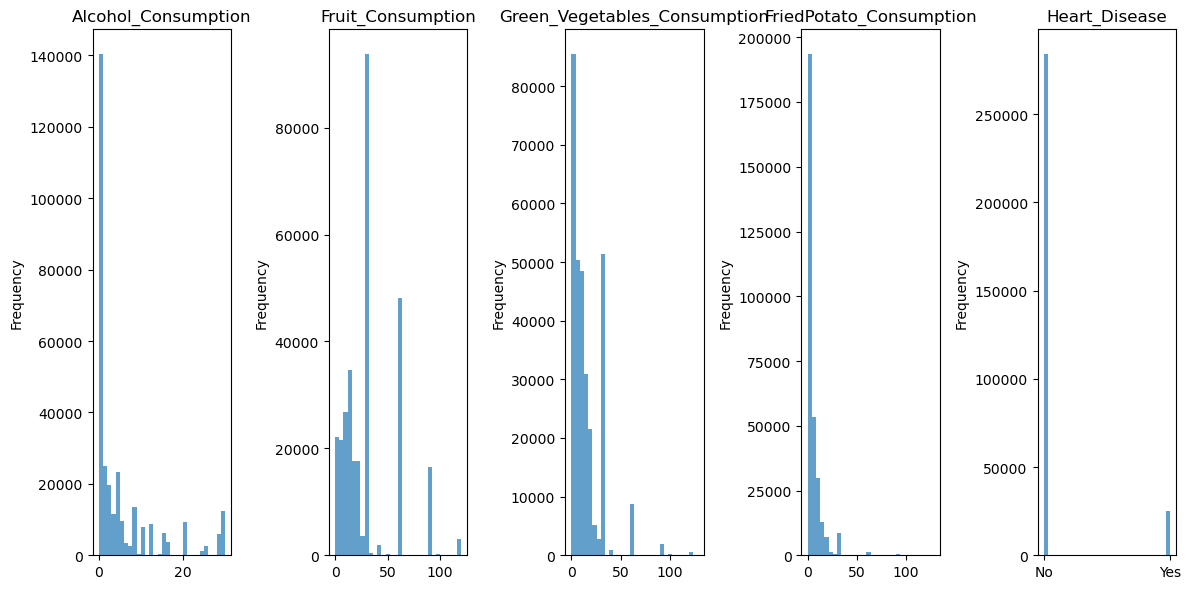

In [63]:
# Select the columns you want to plot
columns_to_plot = ["Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption", "Heart_Disease"]

# Create a single figure to hold all the histograms
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed

# Loop through each column and plot the histogram
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    plt.hist(cardio[column], bins=30, alpha=0.7)
    # plt.xlabel("Consumption")
    plt.ylabel("Frequency")
    plt.title(column)

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

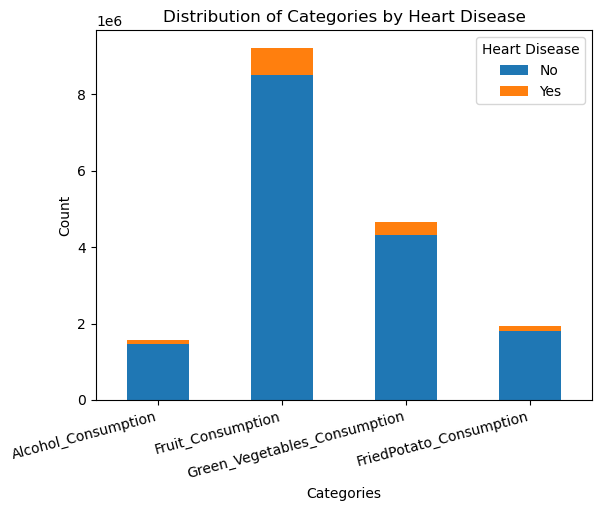

In [59]:
# Select the columns of interest and group by Heart_Disease
columns_of_interest = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
grouped_data = cardio.groupby('Heart_Disease')[columns_of_interest].sum()

# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Plot the stacked bar chart with rotated x-axis labels
ax = grouped_data.T.plot(kind='bar', stacked=True)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Categories by Heart Disease')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=15, ha='right')

plt.show()

<Figure size 1000x600 with 0 Axes>

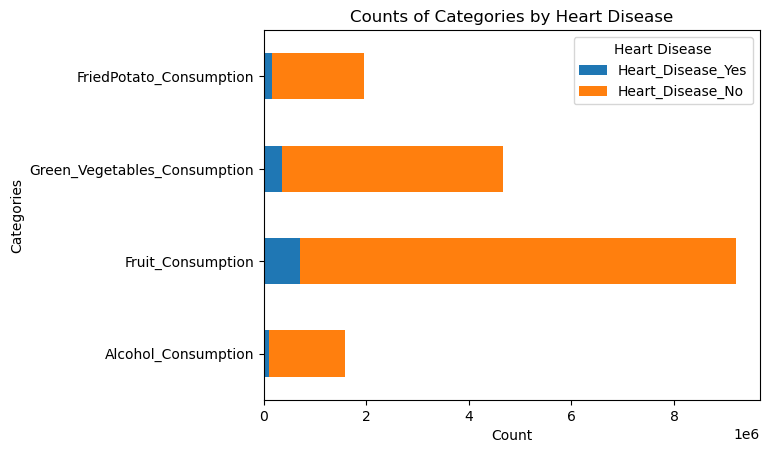

In [60]:
# Separate data for Heart_Disease Yes and No
heart_disease_yes = cardio[cardio['Heart_Disease'] == 'Yes'][columns_of_interest].sum()
heart_disease_no = cardio[cardio['Heart_Disease'] == 'No'][columns_of_interest].sum()

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Heart_Disease_Yes': heart_disease_yes, 'Heart_Disease_No': heart_disease_no})

# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Plot the stacked horizontal bar chart
plot_data.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Counts of Categories by Heart Disease')
plt.legend(title='Heart Disease', loc='upper right')

plt.show()

<Figure size 1000x600 with 0 Axes>

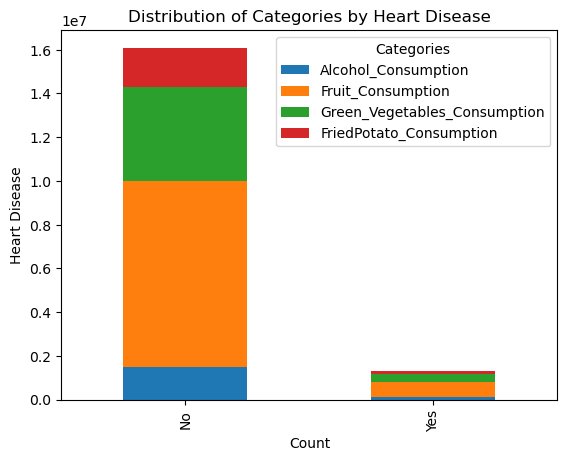

In [61]:
# Select the columns of interest and group by Heart_Disease
columns_of_interest = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
grouped_data = cardio.groupby('Heart_Disease')[columns_of_interest].sum()

# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Plot the stacked horizontal bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Count')
plt.ylabel('Heart Disease')
plt.title('Distribution of Categories by Heart Disease')
plt.legend(title='Categories', loc='upper right')

plt.show()

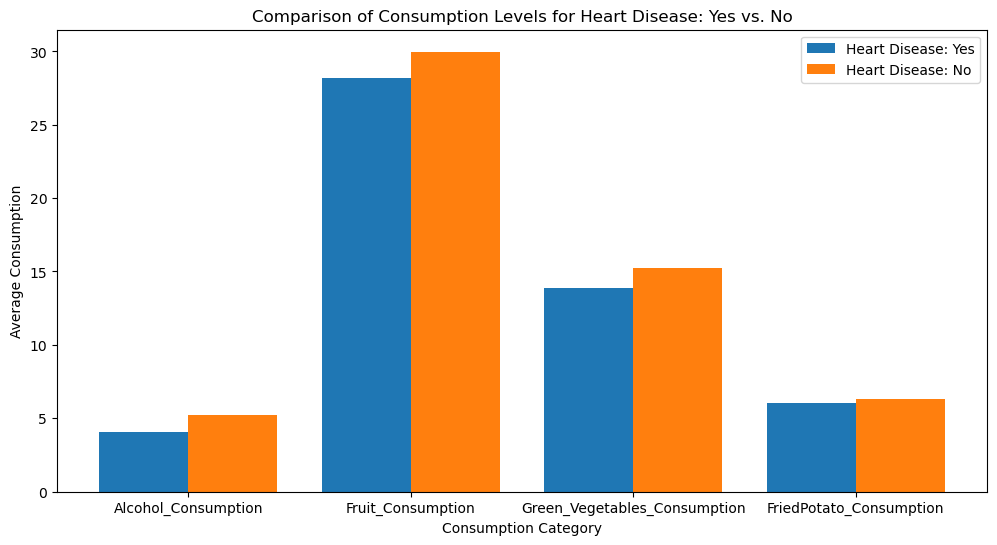

In [71]:
# Select the columns you want to compare
columns_to_compare = ["Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

# Group the data by Heart_Disease and calculate the mean consumption for each group
grouped_data = cardio.groupby("Heart_Disease")[columns_to_compare].mean()

# Transpose the data for easier plotting
grouped_data = grouped_data.T

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
width = 0.4  # Width of the bars

# Position of the bars on the x-axis
x = range(len(columns_to_compare))

# Plot bars for "Yes" and "No" groups side by side
plt.bar(x, grouped_data["Yes"], width=width, label="Heart Disease: Yes")
plt.bar([pos + width for pos in x], grouped_data["No"], width=width, label="Heart Disease: No")

# Customize the plot
plt.xlabel("Consumption Category")
plt.ylabel("Average Consumption")
plt.title("Comparison of Consumption Levels for Heart Disease: Yes vs. No")
plt.xticks([pos + width/2 for pos in x], columns_to_compare)
plt.legend()

# Show the plot
plt.show()
